## John John frække faseforskydningsfysik

In [110]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import butter, lfilter

from QRSDetectorOffline import QRSDetectorOffline


root_dir = "/work3/s174159/data/"
ecg_path = root_dir + "04/02/viatom-raw.csv"
index_path = root_dir + "04/02/c920.csv"


index_df = pd.read_csv(index_path, header=None, names=["timestamp", "idx_sig"])
df = pd.read_csv(ecg_path)

lead_names = ["Lead I", "Lead II", "Lead III", "Lead aVR", "Lead aVL"]
df["Lead"] = lead_names * (len(df) // 5)
df["time"] = (df["milliseconds"] - df["milliseconds"].min()) / 1000  # Convert time.

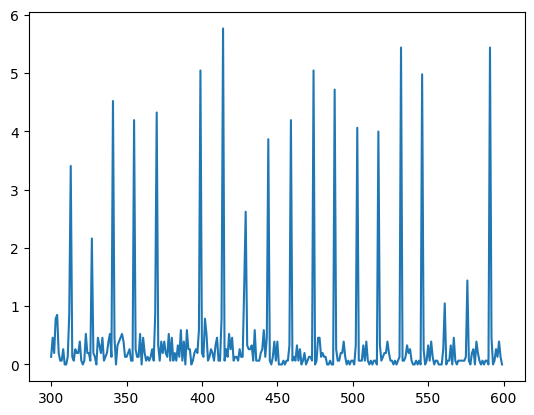

In [111]:
x = df[df["Lead"] == "Lead II"][" ECG"].reset_index()
y = df[df["Lead"] == "Lead I"][" ECG"].reset_index()

signal = x - y
signal = signal.drop(columns="index")
signal.to_csv("hi2.csv")
plt.plot(abs(signal[300:600] / 1e6))
plt.show()

In [112]:
signal

,ECG
0,196608
1,-458752
2,-65536
3,0
4,0
...,...
2318,196608
2319,-524288
2320,-1769472
2321,-131072


In [113]:
def bandpass_filter(data, lowcut, highcut, fs, order=5):
    nyquist = 0.5 * fs
    low = lowcut / nyquist
    high = highcut / nyquist
    b, a = butter(order, [low, high], btype="band")
    y = lfilter(b, a, data)
    return y

In [114]:
# Define the filter parameters
lowcut = 0.05  # Low-cut frequency in Hz
highcut = 100.0  # High-cut frequency in Hz
fs = 500  # Sampling frequency in Hz
order = 1  # Filter order

In [115]:
signal[" ECG"].values

array([  196608,  -458752,   -65536, ..., -1769472,  -131072,   262144])

In [116]:
filtered = bandpass_filter(signal[" ECG"].values, lowcut, highcut, fs, order)

In [117]:
filtered = pd.DataFrame(filtered, columns=[" ECG"])
filtered

,ECG
0,82702.516567
1,-97188.330920
2,-235956.803163
3,-64882.941765
4,-10130.591076
...,...
2318,81536.667882
2319,-134725.431077
2320,-996001.550090
2321,-966759.917844


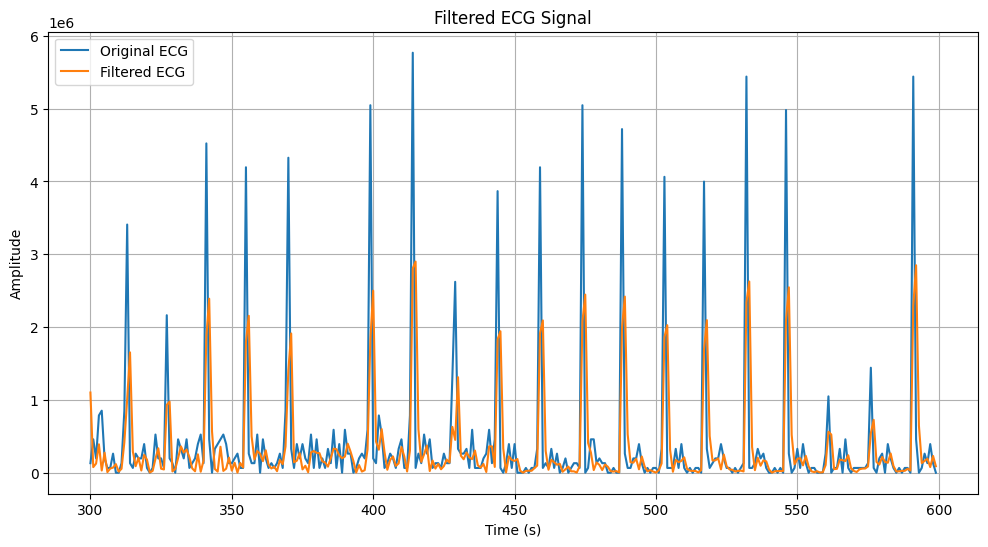

In [118]:
# Plot the original and filtered ECG signals
plt.figure(figsize=(12, 6))
plt.plot(abs(signal[" ECG"][300:600]), label="Original ECG")
plt.plot(abs(filtered[" ECG"][300:600]), label="Filtered ECG")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.legend()
plt.title("Filtered ECG Signal")
plt.grid()
plt.show()

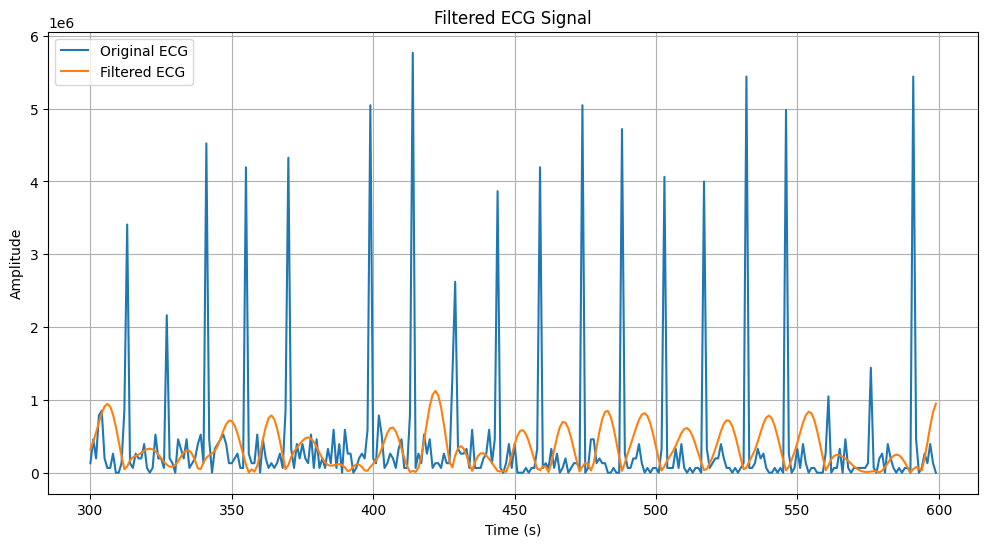

In [131]:
# Define the filter parameters
lowcut = 0.05  # Low-cut frequency in Hz
highcut = 35.0  # High-cut frequency in Hz
fs = 500  # Sampling frequency in Hz
order = 5  # Filter order

filtered = bandpass_filter(signal[" ECG"].values, lowcut, highcut, fs, order)
filtered = pd.DataFrame(filtered, columns=[" ECG"])

# Plot the original and filtered ECG signals
plt.figure(figsize=(12, 6))
plt.plot(abs(signal[" ECG"][300:600]), label="Original ECG")
plt.plot(abs(filtered[" ECG"][300:600]), label="Filtered ECG")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.legend()
plt.title("Filtered ECG Signal")
plt.grid()
plt.show()

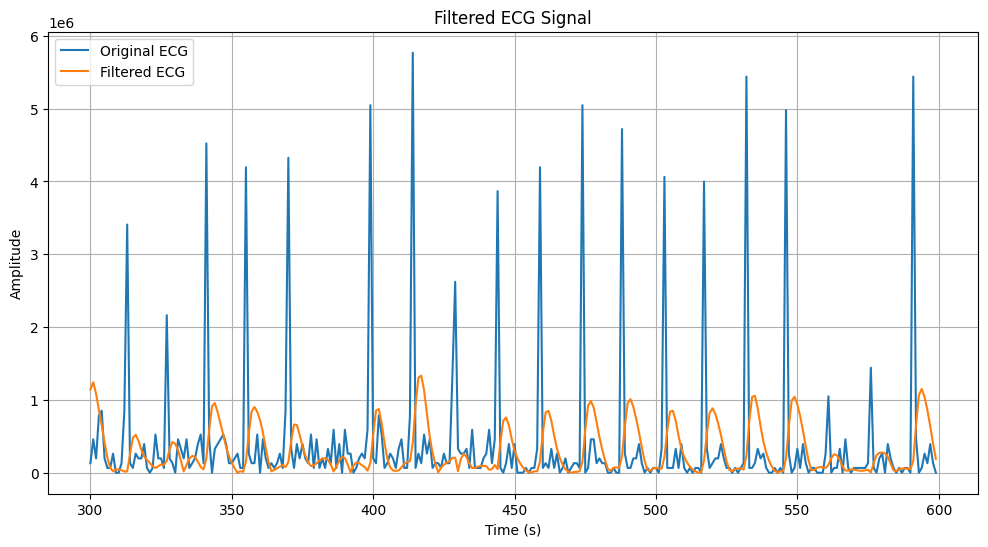

In [132]:
# Define the filter parameters
lowcut = 0.05  # Low-cut frequency in Hz
highcut = 35.0  # High-cut frequency in Hz
fs = 500  # Sampling frequency in Hz
order = 2  # Filter order

filtered = bandpass_filter(signal[" ECG"].values, lowcut, highcut, fs, order)
filtered = pd.DataFrame(filtered, columns=[" ECG"])

# Plot the original and filtered ECG signals
plt.figure(figsize=(12, 6))
plt.plot(abs(signal[" ECG"][300:600]), label="Original ECG")
plt.plot(abs(filtered[" ECG"][300:600]), label="Filtered ECG")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.legend()
plt.title("Filtered ECG Signal")
plt.grid()
plt.show()